In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor



In [4]:
data = pd.read_csv('./clustered_data_v2.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        21613 non-null  float64
 1   bedrooms                     21613 non-null  int64  
 2   bathrooms                    21613 non-null  float64
 3   sqft_lot_normalized          21613 non-null  float64
 4   floors                       21613 non-null  float64
 5   waterfront                   21613 non-null  int64  
 6   view                         21613 non-null  int64  
 7   condition                    21613 non-null  int64  
 8   yr_built                     21613 non-null  int64  
 9   yr_renovated                 21613 non-null  int64  
 10  zipcode                      21613 non-null  int64  
 11  lat                          21613 non-null  float64
 12  long                         21613 non-null  float64
 13  nearest_station_

In [6]:
cluster_zero = data[data['cluster_all_data']==0]
cluster_zero.head(5)

,price,bedrooms,bathrooms,sqft_lot_normalized,floors,waterfront,view,condition,yr_built,yr_renovated,...,is_near_shore,grade_living_normalized,bedrooms_cat,lot_size_category,grade_living_category,outliers_ecod,cluster_all_data,cluster_no_outlier,sqft_lot,grade_living
1,538000.0,3,2.25,8.887791,2.0,0,0,3,1951,1991,...,False,9.797627,3-4,1,2,0,0,0.0,7242,17990
4,510000.0,3,2.00,8.997271,1.0,0,0,3,1987,0,...,False,9.506065,3-4,1,1,0,0,2.0,8080,13440
5,1225000.0,4,4.50,11.532051,1.0,0,0,3,2001,0,...,False,10.995763,3-4,2,2,0,0,0.0,101930,59620
6,257500.0,3,2.25,8.827615,2.0,0,0,3,1995,0,...,False,9.393162,3-4,1,1,0,0,0.0,6819,12005
7,291850.0,3,1.50,9.181118,1.0,0,0,3,1963,0,...,False,8.912069,3-4,2,0,0,0,2.0,9711,7420


In [7]:
df = cluster_zero.copy()
df.describe().T
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15582 entries, 1 to 21611
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        15582 non-null  float64
 1   bedrooms                     15582 non-null  int64  
 2   bathrooms                    15582 non-null  float64
 3   sqft_lot_normalized          15582 non-null  float64
 4   floors                       15582 non-null  float64
 5   waterfront                   15582 non-null  int64  
 6   view                         15582 non-null  int64  
 7   condition                    15582 non-null  int64  
 8   yr_built                     15582 non-null  int64  
 9   yr_renovated                 15582 non-null  int64  
 10  zipcode                      15582 non-null  int64  
 11  lat                          15582 non-null  float64
 12  long                         15582 non-null  float64
 13  nearest_station_dista

In [8]:
# Check which columns are of type object
object_columns = df.select_dtypes(include=['object']).columns
object_columns_list = df[object_columns].head()

object_columns, object_columns_list


(Index(['bathroom_category', 'bedrooms_cat'], dtype='object'),
   bathroom_category bedrooms_cat
 1     2-3 Bathrooms          3-4
 4     1-2 Bathrooms          3-4
 5      +3 Bathrooms          3-4
 6     2-3 Bathrooms          3-4
 7     1-2 Bathrooms          3-4)

In [9]:
df['bedrooms_cat'].unique()

array(['3-4', '>4', '<3'], dtype=object)

In [10]:
# Check which columns are of type object
boolean_columns = df.select_dtypes(include=['bool']).columns
boolean_columns_list = df[boolean_columns].head()

boolean_columns, boolean_columns_list

(Index(['is_near_shore'], dtype='object'),
    is_near_shore
 1          False
 4          False
 5          False
 6          False
 7          False)

In [11]:
# Boolean columns integer'a dönüştürme
boolean_columns = df.select_dtypes(include=['bool']).columns
df[boolean_columns] = df[boolean_columns].astype(int)

#  one-hot encoding ile dönüştürülmesi
categorical_columns = [
    'zipcode', 'waterfront', 'view', 'condition', 
    'lot_size_category', 'grade_living_category','bathroom_category','bedrooms_cat'
]

data_encoded = pd.get_dummies(df, columns=categorical_columns)

# İşe yaramayacak sütunları listeden çıkarmak
columns_to_drop = [
    'cluster_no_outlier', 'outliers_ecod', 'cluster_all_data'
]

# Sadece mevcut sütunları silmek için bir filtre uygulayın
columns_to_drop = [column for column in columns_to_drop if column in data_encoded.columns]

data_cleaned = data_encoded.drop(columns=columns_to_drop)

# Boolean tipindeki sütunları integer'a dönüştürme
bool_columns = data_cleaned.select_dtypes(include=['bool']).columns
data_cleaned[bool_columns] = data_cleaned[bool_columns].astype(int)

# Veri setinin bilgi özeti
print(data_cleaned.columns)

# Veri setinin ilk birkaç satırını görüntüleme
print(data_cleaned.head())


Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot_normalized', 'floors',
       'yr_built', 'yr_renovated', 'lat', 'long',
       'nearest_station_distance_km',
       ...
       'lot_size_category_2', 'grade_living_category_0',
       'grade_living_category_1', 'grade_living_category_2',
       'bathroom_category_+3 Bathrooms', 'bathroom_category_1-2 Bathrooms',
       'bathroom_category_2-3 Bathrooms', 'bedrooms_cat_3-4',
       'bedrooms_cat_<3', 'bedrooms_cat_>4'],
      dtype='object', length=112)
       price  bedrooms  bathrooms  sqft_lot_normalized  floors  yr_built  \
1   538000.0         3       2.25             8.887791     2.0      1951   
4   510000.0         3       2.00             8.997271     1.0      1987   
5  1225000.0         4       4.50            11.532051     1.0      2001   
6   257500.0         3       2.25             8.827615     2.0      1995   
7   291850.0         3       1.50             9.181118     1.0      1963   

   yr_renovated      lat     long 

In [12]:
df = data_cleaned.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15582 entries, 1 to 21611
Columns: 112 entries, price to bedrooms_cat_>4
dtypes: float64(11), int64(101)
memory usage: 13.4 MB


In [13]:
df.head(5)

,price,bedrooms,bathrooms,sqft_lot_normalized,floors,yr_built,yr_renovated,lat,long,nearest_station_distance_km,...,lot_size_category_2,grade_living_category_0,grade_living_category_1,grade_living_category_2,bathroom_category_+3 Bathrooms,bathroom_category_1-2 Bathrooms,bathroom_category_2-3 Bathrooms,bedrooms_cat_3-4,bedrooms_cat_<3,bedrooms_cat_>4
1,538000.0,3,2.25,8.887791,2.0,1951,1991,47.7210,-122.319,2078.181042,...,0,0,0,1,0,0,1,1,0,0
4,510000.0,3,2.00,8.997271,1.0,1987,0,47.6168,-122.045,19789.800401,...,0,0,1,0,0,1,0,1,0,0
5,1225000.0,4,4.50,11.532051,1.0,2001,0,47.6561,-122.005,22454.048889,...,1,0,0,1,1,0,0,1,0,0
6,257500.0,3,2.25,8.827615,2.0,1995,0,47.3097,-122.327,29990.522232,...,0,0,1,0,0,0,1,1,0,0
7,291850.0,3,1.50,9.181118,1.0,1963,0,47.4095,-122.315,18874.712231,...,1,1,0,0,0,1,0,1,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15582 entries, 1 to 21611
Columns: 112 entries, price to cluster_no_outlier_2.0
dtypes: float64(11), int32(94), int64(5), object(2)
memory usage: 7.8+ MB


RANDOM FOREST

In [47]:

# Target 
X = data_cleaned.drop(columns=['price'],axis = 1)  # Features
y = data_cleaned['price']  # Target

# Train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_model = RandomForestRegressor(random_state = 42)

In [51]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [52]:
y_pred = rf_model.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

103284.65583981911

TUNING

In [54]:
rf_params = {'max_depth': list(range(4,6)),
            'max_features': [5,6],
            'n_estimators' : [1800,1900,1950,2000]}

In [ ]:
rf_model = RandomForestRegressor(random_state = 42)

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings

In [56]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [57]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 5], 'max_features': [5, 6],
                         'n_estimators': [1800, 1900, 1950, 2000]})

In [58]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 6, 'n_estimators': 1800}

In [59]:
rf_tuned = RandomForestRegressor(max_depth  = 5, 
                                 max_features = 6, 
                                 n_estimators =1800)

In [60]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=6, n_estimators=1800)

In [61]:
y_pred = rf_tuned.predict(X_test)

In [62]:
rmse_randomf = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_randomf

181111.32661757467

In [63]:
r2_randomf =r2_score(y_test,y_pred)
r2_randomf

0.6274254089695157

In [64]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

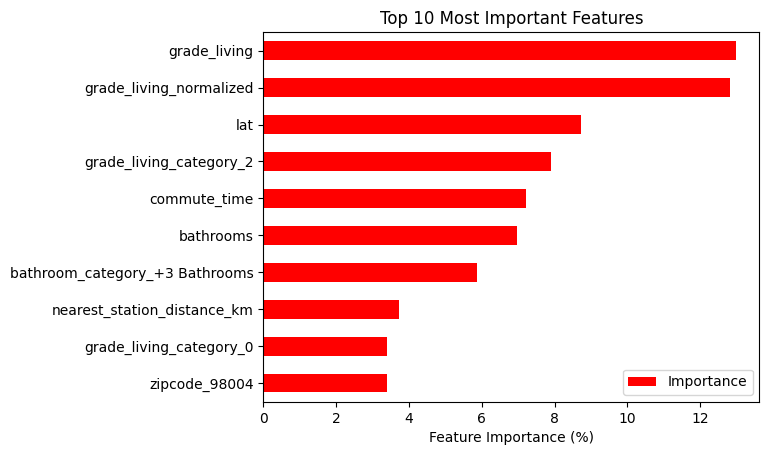

In [68]:
top_10_features = Importance.sort_values(by="Importance", ascending=False).head(10)

# Graph
top_10_features.sort_values(by="Importance", ascending=True).plot(kind='barh', color='r')

# Labels
plt.xlabel('Feature Importance (%)')
plt.title('Top 10 Most Important Features')
plt.show()

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
254 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    es

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RMSE: 114409.18761429194


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


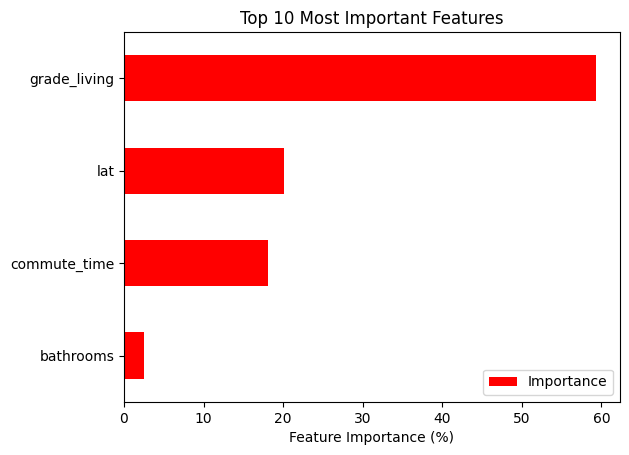

In [69]:
# Define specific features (X) and target (y)
specific_features = ['grade_living', 'lat', 'commute_time', 'bathrooms']
X = data_cleaned[specific_features]
y = data_cleaned['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate feature importances using a preliminary Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

Importance = pd.DataFrame({"Importance": rf.feature_importances_ * 100}, index=X_train.columns)

# Select the top 4 most important features
top_4_features = Importance.sort_values(by="Importance", ascending=False).head(4).index
X_train_top_4 = X_train[top_4_features]
X_test_top_4 = X_test[top_4_features]

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the training data with top 4 features
grid_search.fit(X_train_top_4, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest model with the best parameters on the top 4 features
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_top_4, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test_top_4)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Plot the feature importances
top_10_features = Importance.sort_values(by='Importance', ascending=False).head(10)
top_10_features.sort_values(by='Importance', ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature Importance (%)')
plt.title('Top 10 Most Important Features')
plt.show()

In [70]:
# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 114409.18761429194


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [71]:
randomforest_r2 =r2_score(y_test,y_pred)
randomforest_r2

0.8513229917033521

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
486 fits failed out of a total of 1458.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
189 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    es

Best parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


c:\Users\MainUser\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 108987.59751544335


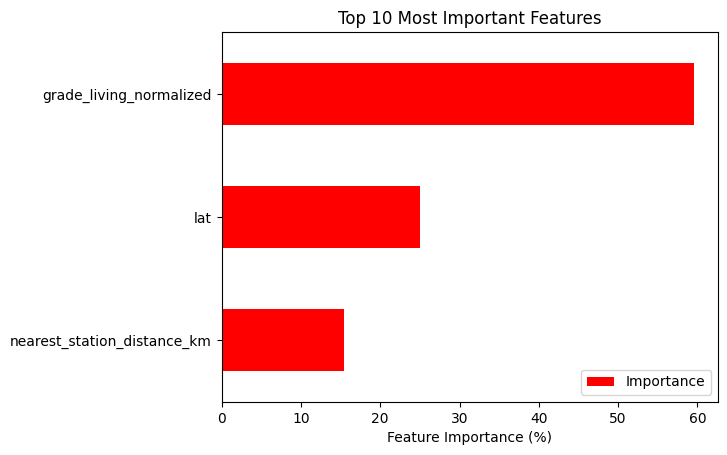

In [72]:
# Define specific features (X) and target (y)
specific_features = ['grade_living_normalized', 'lat', 'nearest_station_distance_km']
X = data_cleaned[specific_features]
y = data_cleaned['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate feature importances using a preliminary Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

Importance = pd.DataFrame({"Importance": rf.feature_importances_ * 100}, index=X_train.columns)

# Select the top 4 most important features
top_4_features = Importance.sort_values(by="Importance", ascending=False).head(3).index
X_train_top_4 = X_train[top_4_features]
X_test_top_4 = X_test[top_4_features]

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the Random Forest model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the training data with top 4 features
grid_search.fit(X_train_top_4, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest model with the best parameters on the top 4 features
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train_top_4, y_train)

# Predict on the test set
y_pred = best_rf.predict(X_test_top_4)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Plot the feature importances
top_10_features = Importance.sort_values(by='Importance', ascending=False).head(10)
top_10_features.sort_values(by='Importance', ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature Importance (%)')
plt.title('Top 10 Most Important Features')
plt.show()

In [73]:
randomforest2_r2 =r2_score(y_test,y_pred)
randomforest2_r2

0.8650800509741416

XGBOOST

In [74]:
import xgboost as xgb

In [79]:
# Define specific features (X) and target (y)
specific_features = ['grade_living_normalized', 'lat', 'nearest_station_distance_km']
X = data_cleaned[specific_features]
y = data_cleaned['price']
print(X.shape)
print(y.shape)

(15582, 3)
(15582,)


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)
print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (12465, 3)
y_train (12465,)
X_test (3117, 3)
y_test (3117,)


In [81]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [82]:
from xgboost import XGBRegressor

In [83]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [84]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

112022.95861812083

Tuning

In [85]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}

In [86]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [87]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200}

In [88]:
xgb_grid_adjusted = {
    'colsample_bytree': [0.8, 0.9, 1.0],  # Adjusted based on the best value (1.0)
    'n_estimators': [150, 200, 250],  # Adjusted based on the best value (200)
    'max_depth': [4, 5, 6],           # Adjusted based on the best value (5)
    'learning_rate': [0.08, 0.1, 0.12]  # Adjusted based on the best value (0.1)
}

In [89]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid_adjusted, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.08, 0.1, 0.12],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [150, 200, 250]},
             verbose=2)

In [90]:
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200}

In [91]:
xgb_tuned = XGBRegressor(colsample_bytree = 1.0, 
                         learning_rate = 0.1, 
                         max_depth = 5, 
                         n_estimators = 200) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [92]:
y_pred = xgb_tuned.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_xgb

106848.09959191937

In [93]:
r2_xgb = r2_score(y_test,y_pred)
r2_xgb

0.8703251918072957

Trial with hole codes for XGBoost

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.08, max_depth=4, n_estimators=150; total tim

/Users/onur/.pyenv/versions/3.11.2/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


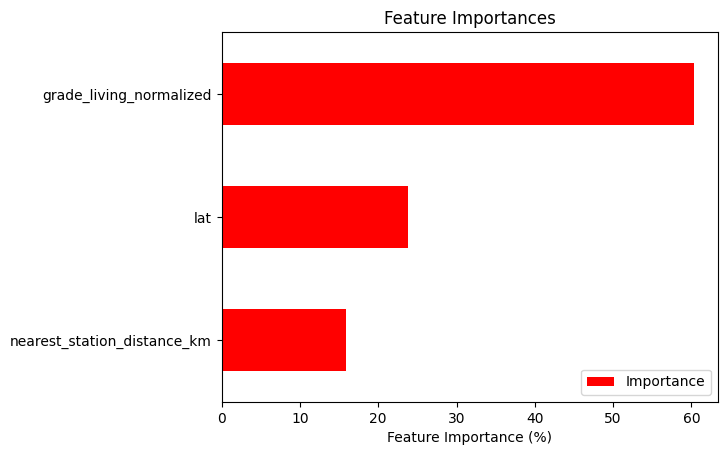

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib


data_cleaned = data_cleaned.dropna()

# Define specific features (X) and target (y)
specific_features = ['grade_living_normalized', 'lat','nearest_station_distance_km']  # Example of top 3 features
X = data_cleaned[specific_features]
y = data_cleaned['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the adjusted parameter grid for GridSearchCV
xgb_grid_adjusted = {
    'colsample_bytree': [0.9, 1.0],
    'n_estimators': [150, 200, 250],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.08, 0.1, 0.12]
}

# Initialize GridSearchCV with the XGBoost model
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_grid_adjusted, cv=10, n_jobs=-1, verbose=2)

# Perform the grid search on the training data with the specific features
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the XGBoost model with the best parameters on the specific features
best_xgb_model = xgb.XGBRegressor(**best_params)
best_xgb_model.fit(X_train, y_train)

# Modeli kaydetme (joblib)
joblib.dump(best_xgb_model, 'model_cluster_0.pkl')
joblib.dump(scaler, 'scaler_cluster_0.pkl')

# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Plot the feature importances
importance = pd.DataFrame({'Importance': best_xgb_model.feature_importances_ * 100}, index=specific_features)
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', color='r')
plt.xlabel('Feature Importance (%)')
plt.title('Feature Importances')
plt.show()


Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 250}
RMSE: 110093.7776943979
R²: 0.8623273861022692

[CV] END colsample_bytree=1.0, learning_rate=0.12, max_depth=6, n_estimators=250; total time=   0.2s
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 250}
RMSE: 110093.7776943979
R²: 0.8623273861022692

In [60]:
y_all = best_xgb_model.predict(X_scaled)


In [61]:
y_all[3]


231011.94

In [78]:
# Assuming df is your original DataFrame
row = 4

# Extracting features for prediction
grade_living = data_cleaned['grade_living_normalized'].iloc[row]
lat =  data_cleaned['lat'].iloc[row]
distance_to_station = data_cleaned['nearest_station_distance_km'].iloc[row]

# Create a dictionary with the features
cluster_0_inputs = {
    'grade_living_normalized': [grade_living],
    'lat': [lat],
    'nearest_station_distance_km': [distance_to_station]
}

# Convert dictionary to DataFrame
cluster_0_inputs_df = pd.DataFrame(cluster_0_inputs)
scaled_inputs = scaler.transform(cluster_0_inputs_df)
predicted_price = best_xgb_model.predict(scaled_inputs)

# Print the predicted price for debugging
print("Predicted Price:")
print(predicted_price)

print("Actual Price:", data_cleaned['price'].iloc[row])

   grade_living_normalized      lat  nearest_station_distance_km
0                 8.912069  47.4095                 18874.712231
[-1.7623831  -1.01826017  0.23771834]
Predicted Price:
[233870.56]
Actual Price: 291850.0


In [73]:
X_scaled.shape

(15582, 3)

In [79]:
predicted_price = best_xgb_model.predict([X_scaled[4]])
predicted_price

array([233870.56], dtype=float32)